In [1]:
import os
import pandas as pd
import numpy as np
import sys
import re
import json

import csv
import time
from datetime import date, datetime

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print(date.today())
print('Python version:', sys.version)
print('\nWorking directory:', os.getcwd())
os.chdir(r'C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Topics')
print('\nCurrent working directory:', os.getcwd())
print("Last run:", date.today())

2025-11-10
Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]

Working directory: c:\Users\Denis_Davydov2\OneDrive\Scipts\Py_Scripts\EPAM\Prophet\AI_skills

Current working directory: C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Topics
Last run: 2025-11-10


In [ ]:

# Load filtered topics with embeddings
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Topics\\'
file_name = 'ai_topics_final2025-11-10.csv'

topics = pd.read_csv(file_path+file_name)
print("File read: ", file_name)

topics

File read:  ai_topics_final2025-11-10.csv


,id,term,definition,count,similarity_to_AI,consensus_score,embedding_norm
0,6.0,1-bit inference,1-bit inference refers to the process of runni...,2.0,0.280766,4,"[0.013369597494602203, -0.013582168146967888, ..."
1,7.0,1-bit llm,A 1-bit large language model (LLM) is a highly...,5.0,0.220254,4,"[0.017574984580278397, -0.004011554177850485, ..."
2,9.0,1-bit quantization,1-bit quantization is an extreme model compres...,6.0,0.187808,3,"[-0.015226091258227825, 0.0012089560041204095,..."
3,14.0,2-bit quantization,2-bit quantization is a process that reduces t...,4.0,0.190536,4,"[-0.006645898800343275, 0.006167215760797262, ..."
4,17.0,2d animation,"""2D animation"" refers to the use of artificial...",3.0,0.370161,5,"[0.008917991071939468, -0.002153154695406556, ..."
...,...,...,...,...,...,...,...
6966,19003.0,zero-shot voice cloning,Zero-shot voice cloning is the task of synthes...,3.0,0.212219,4,"[-0.007965235970914364, -0.027662577107548714,..."
6967,19007.0,zero-trust security,Zero-trust security for AI/ML is an architectu...,4.0,0.419530,5,"[-0.01758248545229435, 0.059987302869558334, 0..."
6968,19010.0,zero/zero++,"""Zero"" (zero-shot) refers to applying or evalu...",2.0,0.243124,4,"[-0.0007028839900158346, 0.011448170058429241,..."
6969,19012.0,zerogpu,"Zerogpu (often stylized ""zerogpu"") refers to C...",2.0,0.299549,4,"[0.004047493916004896, 0.05906970053911209, 0...."


# PCA

## ver.1. PCA

Embeddings shape: (6971, 1536)

=== PCA Component Analysis ===


,Component,Eigenvalue,Explained Variance (%),Cumulative Variance (%)
0,1,0.038974,5.615174,5.615174
1,2,0.021038,3.031070,8.646244
2,3,0.019210,2.767660,11.413905
3,4,0.018244,2.628533,14.042437
4,5,0.014682,2.115368,16.157806
5,6,0.013136,1.892506,18.050312
6,7,0.011547,1.663650,19.713961
7,8,0.011118,1.601778,21.315740
8,9,0.010371,1.494156,22.809896
9,10,0.010076,1.451689,24.261585



Components needed for 80% variance: 166

Components needed for 90% variance: 330

Components needed for 95% variance: 528


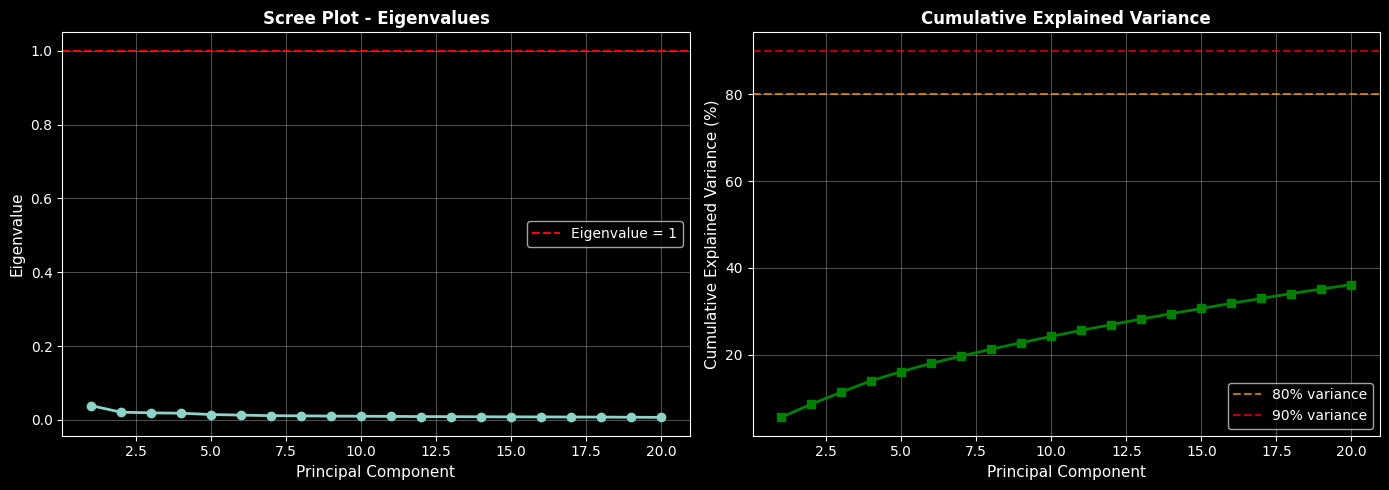

In [4]:


# Convert embedding strings to numpy arrays
# Assuming embeddings are stored as strings, we need to parse them
def parse_embedding(embedding_str):
    """Convert embedding string to numpy array"""
    if isinstance(embedding_str, str):
        # Remove brackets and split by comma
        cleaned = embedding_str.strip('[]').replace('\n', '').replace(' ', '')
        return np.array([float(x) for x in cleaned.split(',') if x])
    return embedding_str

# Parse all embeddings
embeddings_list = topics['embedding_norm'].apply(parse_embedding).tolist()
embeddings_array = np.vstack(embeddings_list)

print(f"Embeddings shape: {embeddings_array.shape}")

# Perform PCA with all components to analyze variance
pca_full = PCA()
pca_full.fit(embeddings_array)

# Create eigenvalues and explained variance table
eigenvalues = pca_full.explained_variance_
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create DataFrame for analysis
n_components = min(20, len(eigenvalues))  # Show first 20 components
pca_analysis = pd.DataFrame({
    'Component': range(1, n_components + 1),
    'Eigenvalue': eigenvalues[:n_components],
    'Explained Variance (%)': explained_variance_ratio[:n_components] * 100,
    'Cumulative Variance (%)': cumulative_variance[:n_components] * 100
})

print("\n=== PCA Component Analysis ===")
display(pca_analysis)

# Identify components explaining 80%, 90%, 95% variance
for threshold in [80, 90, 95]:
    n_comp = np.argmax(cumulative_variance >= threshold/100) + 1
    print(f"\nComponents needed for {threshold}% variance: {n_comp}")

# Create Scree Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Eigenvalues (Scree plot)
ax1.plot(range(1, n_components + 1), eigenvalues[:n_components], 
         marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
ax1.set_xlabel('Principal Component', fontsize=11)
ax1.set_ylabel('Eigenvalue', fontsize=11)
ax1.set_title('Scree Plot - Eigenvalues', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Cumulative Explained Variance
ax2.plot(range(1, n_components + 1), cumulative_variance[:n_components] * 100,
         marker='s', linestyle='-', linewidth=2, markersize=6, color='green')
ax2.axhline(y=80, color='orange', linestyle='--', label='80% variance', alpha=0.7)
ax2.axhline(y=90, color='red', linestyle='--', label='90% variance', alpha=0.7)
ax2.set_xlabel('Principal Component', fontsize=11)
ax2.set_ylabel('Cumulative Explained Variance (%)', fontsize=11)
ax2.set_title('Cumulative Explained Variance', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()



In [ ]:

# Apply PCA with optimal number of components (e.g., 90% variance)
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\n=== Applying PCA with {optimal_components} components ===")

pca = PCA(n_components=optimal_components)
topics_pca = pca.fit_transform(embeddings_array)

print(f"Reduced shape: {topics_pca.shape}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# Add PCA components to dataframe
for i in range(optimal_components):
    topics[f'PC{i+1}'] = topics_pca[:, i]

print("\nPCA components added to topics dataframe")

## Ver.2 PCA 

X shape: (6971, 1536)


,component,eigenvalue,explained_variance_ratio,cumulative_explained_variance
0,1,0.038974,0.056152,0.056152
1,2,0.021038,0.030311,0.086462
2,3,0.019210,0.027677,0.114139
3,4,0.018244,0.026285,0.140424
4,5,0.014682,0.021154,0.161578
5,6,0.013136,0.018925,0.180503
6,7,0.011547,0.016637,0.197140
7,8,0.011118,0.016018,0.213157
8,9,0.010371,0.014942,0.228099
9,10,0.010076,0.014517,0.242616


,component,eigenvalue,explained_variance_ratio,cumulative_explained_variance
1531,1532,2.665118e-06,3.839779e-06,0.999993
1532,1533,2.552350e-06,3.677308e-06,0.999997
1533,1534,2.246840e-06,3.237143e-06,1.000000
1534,1535,1.854037e-07,2.671210e-07,1.000000
1535,1536,2.076464e-08,2.991673e-08,1.000000


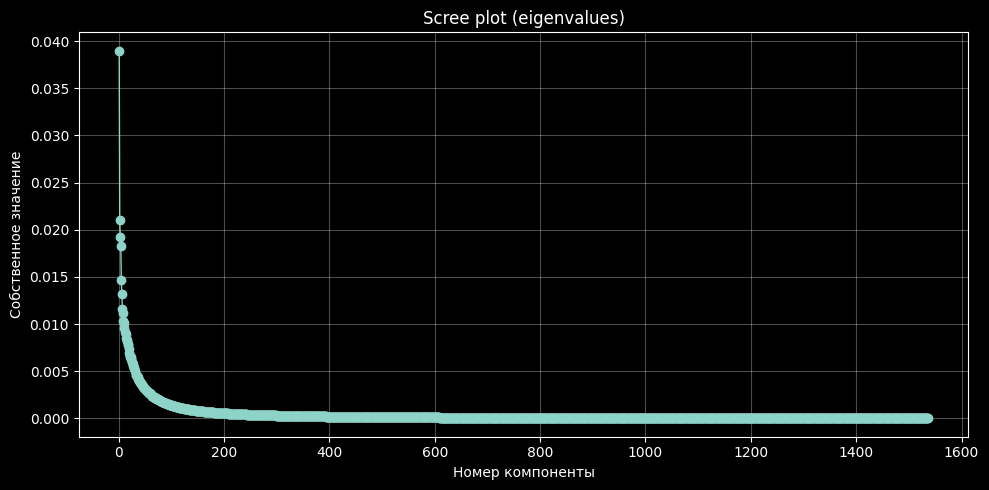

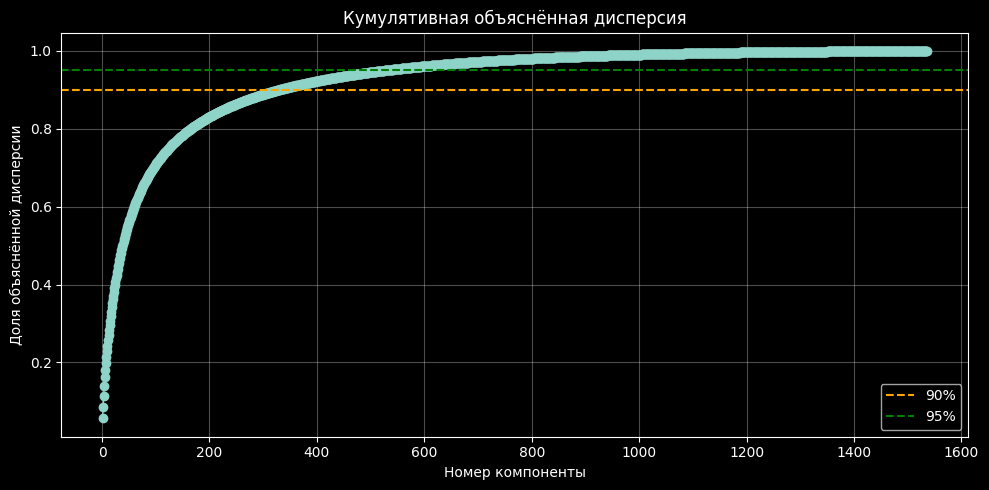

Компонент для >=90% дисперсии: 330
Компонент для >=95% дисперсии: 528
Эвристика локтя (elbow): ~4 компонент
Reduced shape: (6971, 528)
     component  eigenvalue  explained_variance_ratio  \
518        519    0.000121                  0.000174   
519        520    0.000120                  0.000173   
520        521    0.000120                  0.000173   
521        522    0.000119                  0.000172   
522        523    0.000119                  0.000172   
523        524    0.000119                  0.000171   
524        525    0.000118                  0.000170   
525        526    0.000118                  0.000170   
526        527    0.000118                  0.000169   
527        528    0.000117                  0.000169   

     cumulative_explained_variance  
518                       0.948599  
519                       0.948772  
520                       0.948945  
521                       0.949116  
522                       0.949288  
523                       

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1) Подготовка данных
# df: pandas DataFrame с колонкой 'embedding_norm' — списки/np.array длиной 1536
# Пример: df = pd.read_parquet('your_file.parquet')
emb_col = 'embedding_norm'
assert emb_col in topics.columns, f"Колонки {emb_col} нет в df"

# Превращаем колонку списков в матрицу X (n_samples, n_features)
# Если данные сохранены как строки, конвертируем их обратно в массивы
if isinstance(topics[emb_col].iloc[0], str):
    import ast
    topics[emb_col] = topics[emb_col].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x)

X = np.vstack(topics[emb_col].values).astype(np.float32)
n_samples, n_features = X.shape
print(f"X shape: {X.shape}")  # Ожидается (6971, 1536)

# 2) PCA: берём максимум возможных компонент, чтобы построить полный график осыпи
# Для стабильности используем полный SVD; randomized — быстрее, но не нужен на 6971×1536
pca = PCA(n_components=min(n_samples, n_features), svd_solver='full', random_state=0)
pca.fit(X)

# 3) Таблица собственных значений и объяснённой дисперсии
# В sklearn:
# - pca.explained_variance_ — собственные значения ковариационной матрицы (λ_i)
# - pca.explained_variance_ratio_ — доля объяснённой дисперсии по компоненте
eigenvalues = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var_ratio)

eig_table = pd.DataFrame({
    'component': np.arange(1, len(eigenvalues) + 1),
    'eigenvalue': eigenvalues,
    'explained_variance_ratio': exp_var_ratio,
    'cumulative_explained_variance': cum_exp_var
})

display(eig_table.head(15))  # первые 15 компонент
display(eig_table.tail(5))   # последние 5 компонент

# 4) График осыпи (scree plot) + кумулятивная объяснённая дисперсия
plt.figure(figsize=(10, 5))
plt.plot(eig_table['component'], eig_table['eigenvalue'], marker='o', linewidth=1)
plt.title('Scree plot (eigenvalues)')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(eig_table['component'], eig_table['cumulative_explained_variance'], marker='o', linewidth=1)
plt.axhline(0.90, color='orange', linestyle='--', label='90%')
plt.axhline(0.95, color='green', linestyle='--', label='95%')
plt.title('Кумулятивная объяснённая дисперсия')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объяснённой дисперсии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Выбор числа компонент
k90 = int(np.argmax(cum_exp_var >= 0.90) + 1)
k95 = int(np.argmax(cum_exp_var >= 0.95) + 1)
print(f"Компонент для >=90% дисперсии: {k90}")
print(f"Компонент для >=95% дисперсии: {k95}")

# Простой «локоть»: найдём индекс, где падение eigenvalue резко уменьшается
# (эвристика через вторую разность)
diff1 = np.diff(eigenvalues)
diff2 = np.diff(diff1)
if len(diff2) > 0:
    elbow = int(np.argmax(-diff2) + 2)  # +2 сдвиг от второй разности к индексу компоненты
    print(f"Эвристика локтя (elbow): ~{elbow} компонент")
else:
    elbow = k90

# 6) Трансформация в выбранное пространство (пример — берём k95)
k = k95
pca_k = PCA(n_components=k, svd_solver='full', random_state=0)
Z = pca_k.fit_transform(X)   # Z shape: (n_samples, k)
print(f"Reduced shape: {Z.shape}")

# При необходимости сохраним координаты и загрузки (loadings)
# Загрузки: contribution исходных признаков в компоненты
loadings = pca_k.components_.T * np.sqrt(pca_k.explained_variance_)  # shape (1536, k)

# Добавим координаты в df (по желанию)
for i in range(k):
    topics[f'PC{i+1}'] = Z[:, i]

# Таблица итоговой объяснённой дисперсии для выбранных k
report_k = pd.DataFrame({
    'component': np.arange(1, k + 1),
    'eigenvalue': pca_k.explained_variance_,
    'explained_variance_ratio': pca_k.explained_variance_ratio_,
    'cumulative_explained_variance': np.cumsum(pca_k.explained_variance_ratio_)
})
print(report_k.tail(10))

In [10]:
topics

,id,term,definition,count,similarity_to_AI,consensus_score,embedding_norm,PC1,PC2,PC3,...,PC519,PC520,PC521,PC522,PC523,PC524,PC525,PC526,PC527,PC528
0,6.0,1-bit inference,1-bit inference refers to the process of runni...,2.0,0.280766,4,"[0.013369597494602203, -0.013582168146967888, ...",0.150946,-0.074341,0.017275,...,-0.000218,0.008112,-0.009613,0.013930,0.007458,-0.013097,0.001878,-0.000096,0.001090,-0.007243
1,7.0,1-bit llm,A 1-bit large language model (LLM) is a highly...,5.0,0.220254,4,"[0.017574984580278397, -0.004011554177850485, ...",0.371468,-0.029280,-0.086802,...,0.015993,0.013675,0.008738,-0.003764,-0.000767,-0.021059,-0.004371,0.008564,-0.002865,-0.009274
2,9.0,1-bit quantization,1-bit quantization is an extreme model compres...,6.0,0.187808,3,"[-0.015226091258227825, 0.0012089560041204095,...",0.258881,-0.039735,0.013483,...,0.014773,0.011791,0.010739,0.014068,0.016865,-0.007714,-0.015460,0.003893,-0.003218,-0.012903
3,14.0,2-bit quantization,2-bit quantization is a process that reduces t...,4.0,0.190536,4,"[-0.006645898800343275, 0.006167215760797262, ...",0.297753,-0.043195,0.010760,...,0.020790,0.002294,0.004794,-0.004534,0.004249,-0.012387,0.015698,-0.005678,0.011250,-0.004905
4,17.0,2d animation,"""2D animation"" refers to the use of artificial...",3.0,0.370161,5,"[0.008917991071939468, -0.002153154695406556, ...",-0.146382,0.212892,-0.017579,...,0.013029,-0.001977,0.005127,0.008336,-0.018090,0.005548,0.006969,0.017683,0.014300,0.019335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,19003.0,zero-shot voice cloning,Zero-shot voice cloning is the task of synthes...,3.0,0.212219,4,"[-0.007965235970914364, -0.027662577107548714,...",0.172428,0.299621,0.001305,...,0.030481,-0.001203,-0.016520,-0.001073,0.003713,-0.014113,-0.002389,-0.011673,0.010671,0.015016
6967,19007.0,zero-trust security,Zero-trust security for AI/ML is an architectu...,4.0,0.419530,5,"[-0.01758248545229435, 0.059987302869558334, 0...",-0.031622,-0.173092,-0.003272,...,-0.006328,0.006692,0.013600,-0.000375,0.022166,-0.001546,-0.006815,0.008862,0.015057,0.008248
6968,19010.0,zero/zero++,"""Zero"" (zero-shot) refers to applying or evalu...",2.0,0.243124,4,"[-0.0007028839900158346, 0.011448170058429241,...",0.264990,0.037731,0.013485,...,-0.014672,-0.006940,0.025398,-0.010083,0.009563,0.018189,-0.001374,-0.014252,0.006014,0.001534
6969,19012.0,zerogpu,"Zerogpu (often stylized ""zerogpu"") refers to C...",2.0,0.299549,4,"[0.004047493916004896, 0.05906970053911209, 0....",0.152126,-0.145668,-0.305555,...,-0.003575,-0.000518,0.006381,-0.011810,0.035700,-0.008212,0.002317,0.011002,-0.009422,-0.006368
